# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [3]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [9]:
df[df.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


Answer: 400. 3 observations have NaN values.

> ### Question 2.  Create a summary table.

In [10]:
df.describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [ ]:
# TODO

Answer: GRE is based on a much larger scale consisting of larger numbers than GPA (GRE is 200-800 while GPA is 0-4). GRE has a larger mean and a larger range of possible values. 

> ### Question 4.  Drop data points with missing data.

In [21]:
df = df[df.notnull().all(axis=1)]

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


Answer: Run info() again, this time it shows 397 non-null values in each column

> ### Question 6.  Create boxplots for `gre` and `gpa`.

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


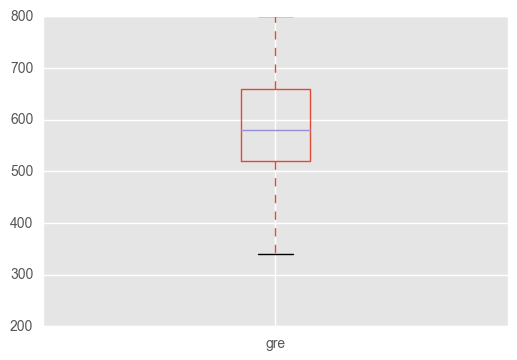

In [26]:
df.boxplot(column='gre');

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


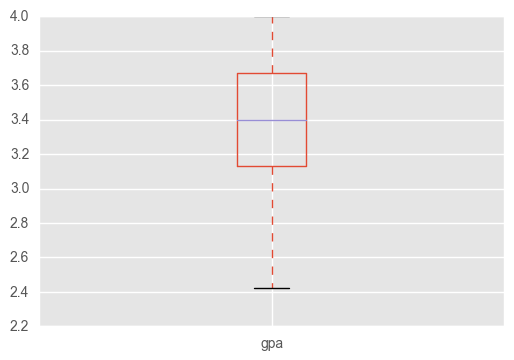

In [25]:
df.boxplot(column='gpa');

> ### Question 7.  What do boxplots show?

Answer: Median, 2nd Quartile, 3rd Quartile, Max and Min

> ### Question 8.  Plot the distribution of each variable.

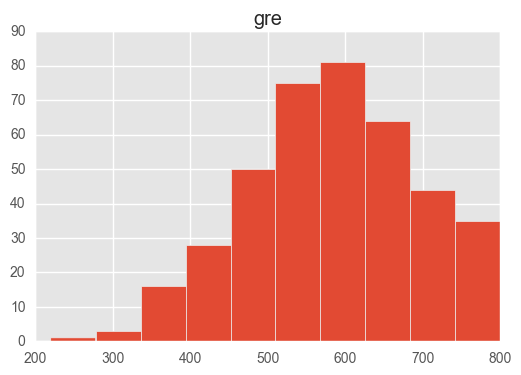

In [27]:
df.hist(column='gre');

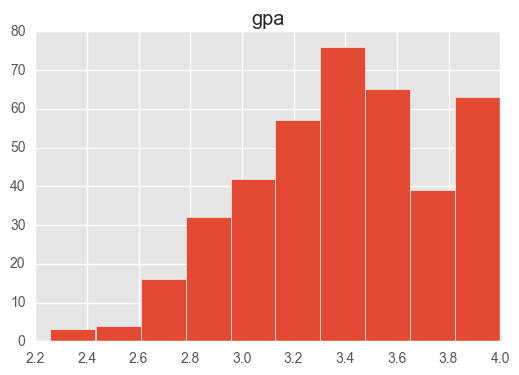

In [28]:
df.hist(column='gpa');

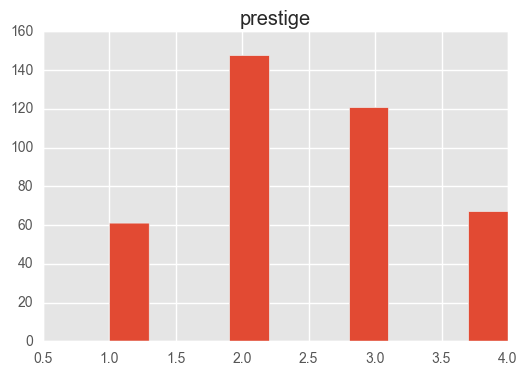

In [29]:
df.hist(column='prestige');

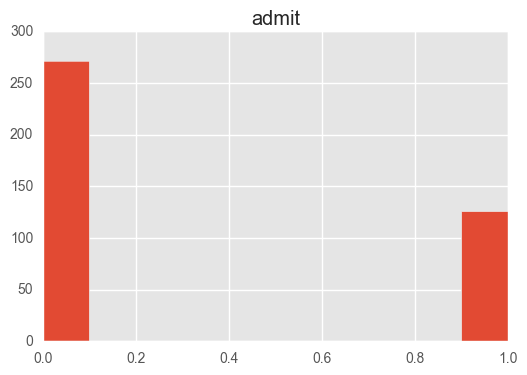

In [30]:
df.hist(column='admit');

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [ ]:
# TODO

In [ ]:
# TODO

Answer: GRE and GPA both appear to not have a normal distribution, as there is not an equal number of observations on either side of the mean. Both appear to be left skewed. We would need to correct the assumed distributions in the model, otherwise our results will be biased. We may be able to transform the data to make the correction.

> ### Question 10.  Create a correlation matrix for the dataset

In [32]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: GRE and GPA are potentially colinear

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.


Answer: Linear regression would be a good tool to use to isolate the impact of varying tiers of prestige on graduate school admission rates. 

Another interesting way to visualize the relationship might be as follows:
Classify the applicants into three or more groups (high, medium, low) according to GRE and GPA (ex: high is GPA of 3.5 - 4.0 and GRE 700 - 800, etc.)
Within each of the three groups, identify the acceptance rates by prestige tier. 
In this analysis, we are exploring the possibility that the impact of an applicant's prestige tier might vary according to how strong of an applicant he/she is otherwise. 

This might be more elegantly captured also using linear regression, by introducing new columns into our dataframe that combine prestige/GPA and prestige/GRE

We can also use Lasso Regression to help us determine whether we are at risk of colinearity by using both GRE and GPA.

Logistic regression should also be tested, to see if the impact of prestige is not linear.

In [37]:
from sklearn.linear_model import LinearRegression

# set our features and response
y, X = df['admit'], df.drop('admit', axis=1)

# create the model
lr = LinearRegression()

# fit the model
lr.fit(X, y)

# coefficients
lr.coef_

array([ 0.00043428,  0.1462233 , -0.10966606])

In [40]:
X.columns

Index([u'gre', u'gpa', u'prestige'], dtype='object')

> ### Question 13.  What is your hypothesis?

Answer: My hypothesis for the simple analysis is that a lower prestige tier will correlate with a higher acceptance rate. 
Also, I hypothesize that there will be a larger dropoff between prestige tier 1 and tier 2 than the between other tiers (logistic regression may be more appropriate). 
Further, I hypothesize that having prestige tier 1 will have a larger impact on the best and the worst applicants than on the inbetween applicants. 